- We are living in a world of social media feeds, tweets and new articles. This huge data could be leveraged to predict people sentiment towards a particular company or stock
- Natural Language Processing (NLP) works by converting words into numbers. These numbers are then used to train an AI/ML model to make predictions.
- AI/ML-based sentiment analysis models can be used to understand the sentiment from public tweets, which could be used as a factor while making a buy/sell order of securities.

# IMPORT LIBARIES, DATASET AND PERFORM EXPORATORY DATA ANALYSIS

In [ ]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the stock news data
stock_df = pd.read_csv("/content/stock_sentiment.csv")
stock_df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [ ]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [ ]:
#check for null values
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


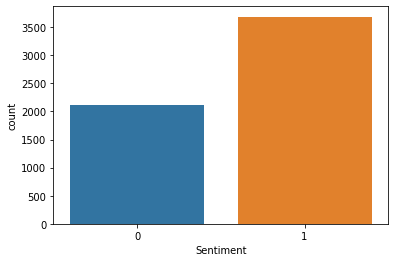

In [ ]:
#find unique elements in the "sentiment" column
sns.countplot(stock_df['Sentiment'])

In [ ]:
stock_df['Sentiment'].nunique()

2

# PERFORM DATA CLEANING

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc(message):
  Test_punct_removed = [char for char in message if char not in string.punctuation]
  Test_punct_removed_join = ''.join(Test_punct_removed)
  return Test_punct_removed_join

In [ ]:
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...


In [ ]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['from','subject','re','edu','use','will','app','co','day','user','stock','today','week','year','https'])

In [ ]:
#remove stopwords
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in stop_words and len(token) >=3:
      result.append(token)

  return result

In [ ]:
#apply to text column
stock_df['Text w/o punctuation and stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text w/o punctuation and stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[aap, movie, return, feageed, indicator, trade..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]
...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s..."
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,..."
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri..."
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift..."


# PLOT WORDCLOUD


In [ ]:
stock_df['Text w/o punctuation and stopwords joined'] = stock_df['Text w/o punctuation and stopwords'].apply(lambda x: ' '.join(x))

In [ ]:
stock_df

,Text,Sentiment,Text Without Punctuation,Text w/o punctuation and stopwords,Text w/o punctuation and stopwords joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[aap, movie, return, feageed, indicator, trade...",aap movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],
...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,0,Industry body CII said discoms are likely to s...,"[industry, body, cii, said, discoms, likely, s...",industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",0,Gold prices slip below Rs 46000 as investors b...,"[gold, prices, slip, investors, book, profits,...",gold prices slip investors book profits amid c...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,Workers at Bajaj Auto have agreed to a 10 wage...,"[workers, bajaj, auto, agreed, wage, cut, peri...",workers bajaj auto agreed wage cut period apri...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,Sharemarket LIVE Sensex off day’s high up 600 ...,"[sharemarket, live, sensex, high, points, nift...",sharemarket live sensex high points nifty test...


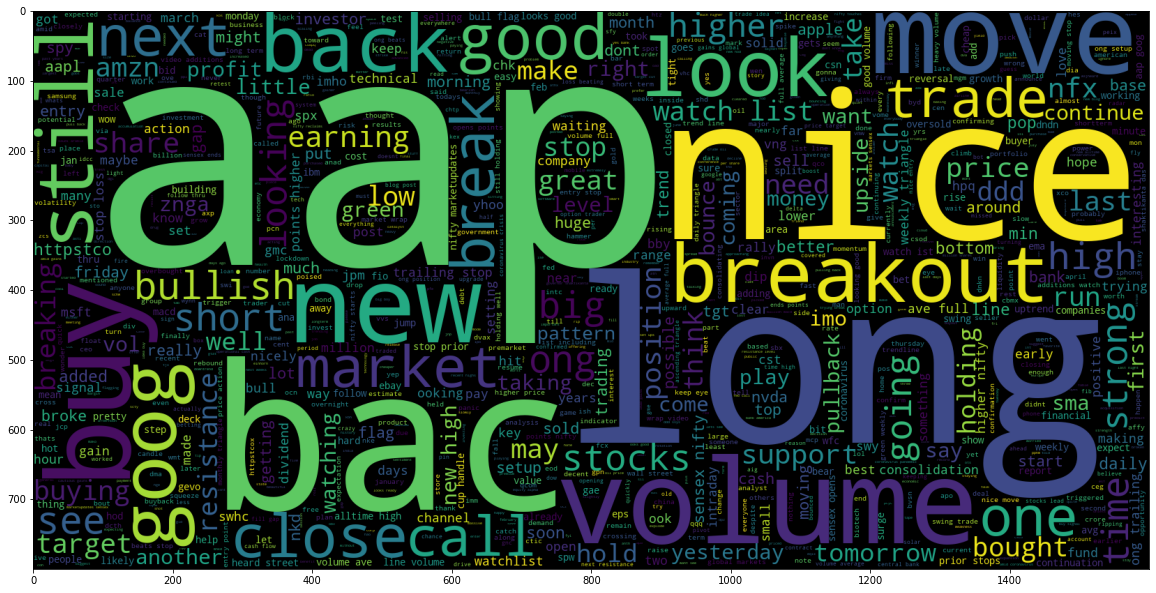

In [ ]:
#positive Sentiment which column "sentiment" = 1
plt.figure(figsize = (20,20))
wc = WordCloud(max_words= 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text w/o punctuation and stopwords joined']))
plt.imshow(wc)

We realise when people are positive with sentiment, the word "long" is common. Other common word is "buy". People are talking about buying securities. 

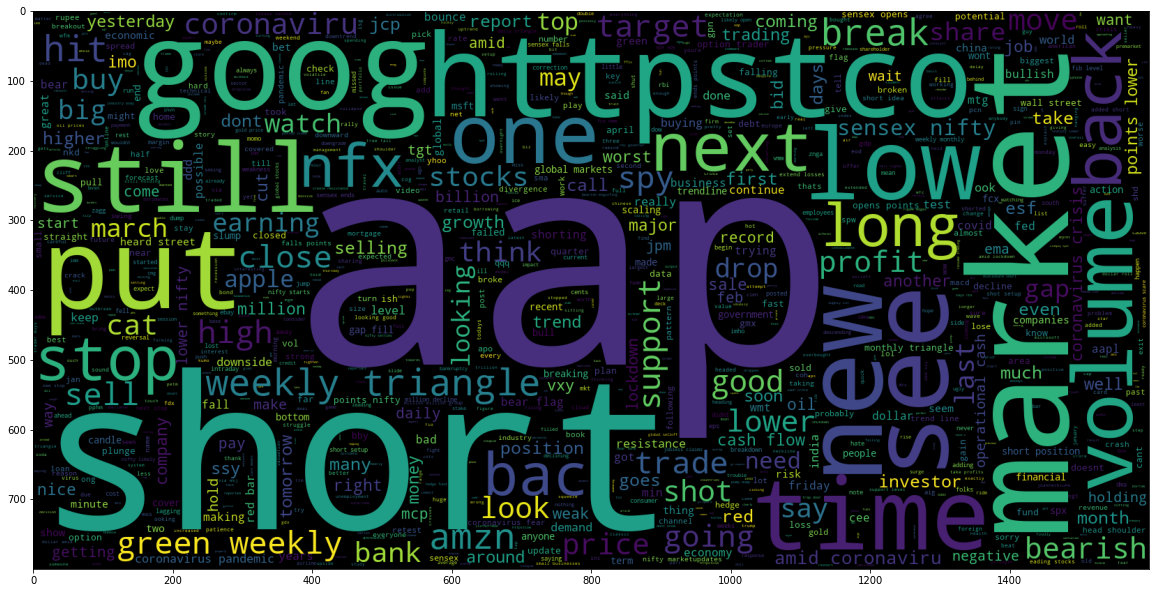

In [ ]:
#visualize the wordcloud for tweets that have negative sentiment
plt.figure(figsize = (20,20))
wc_neg = WordCloud(max_words= 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text w/o punctuation and stopwords joined']))
plt.imshow(wc_neg)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#obtain the max length of data in the document
#this will be later used when word embeddings are generated
maxlen = -1
for doc in stock_df['Text w/o punctuation and stopwords joined']:
  tokens = nltk.word_tokenize(doc)
  if (maxlen < len(tokens)):
    maxlen = len(tokens)

print(f"Max number of words in any document is {maxlen}")

Max number of words in any document is 20


In [ ]:
tweets_length = [ len(nltk.word_tokenize(x))  for x in stock_df['Text w/o punctuation and stopwords joined']]

In [ ]:
fig = px.histogram( x = tweets_length, nbins = 50)
fig.show()

The max length of tweet that we have is around 10.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



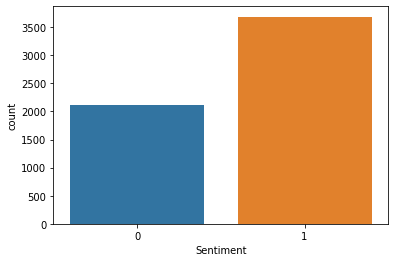

In [ ]:
#use seaborn to visualize indicate how many samples belong to the positive and negative sentiments class
sns.countplot(stock_df['Sentiment'])

# PREPARE THE DATA BY TOKENIZING AND PADDING

- Tokenizer allows us to vectorize text corpus.
- Tokenization works by turning each text into sequence of integers.

In [ ]:
list_of_words  = []

for i in stock_df['Text w/o punctuation and stopwords']:
  for j in i:
    list_of_words.append(j)
    

In [ ]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'aap',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'aap',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'aap',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'aap',
 'gamcos',
 'arry',
 'haverty'

In [ ]:
#obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [ ]:
#split the data into test and train
X = stock_df['Text w/o punctuation and stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape

(5211,)

In [ ]:
X_test.shape

(580,)

In [ ]:
#create tokenizer to tokenize the words and create sequence of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

#training data
train_sequences = tokenizer.texts_to_sequences(X_train)

#testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
train_sequences

[[7,
  3629,
  3630,
  764,
  765,
  1508,
  3631,
  3632,
  695,
  266,
  1863,
  2449,
  39,
  24,
  486,
  3633],
 [1, 435, 567, 599, 80, 39, 600],
 [25, 487, 46, 16, 29, 851, 48, 766, 568, 30, 455, 25, 29, 318],
 [1284, 121, 121, 1103, 22],
 [40, 3634, 3635, 456, 3636, 525],
 [3637, 14, 411, 246],
 [63, 106, 5, 56, 4, 526, 35, 59, 488, 2450, 1864],
 [852, 1104, 457, 3638, 185, 955],
 [40, 273, 24, 767, 768, 152, 287],
 [1285, 45, 4, 76, 458, 769],
 [853, 17, 34, 9, 3],
 [2451, 5, 364],
 [459, 6, 158, 4],
 [27, 21, 3639, 90],
 [234, 2452, 3640, 66, 79, 3641, 3642],
 [854, 855, 301, 527, 856, 1509, 528, 1510, 288, 99],
 [289, 27, 42, 956],
 [247, 3643, 2453, 529, 57, 489, 1105, 1511, 1286, 1865],
 [2454,
  274,
  3644,
  124,
  490,
  3645,
  2455,
  163,
  3646,
  2456,
  275,
  1866,
  3647,
  3648],
 [72, 2457, 2458, 3649, 569, 1867, 1512, 412, 1287, 113, 16, 1106],
 [125, 45, 168, 91],
 [601, 32, 2459],
 [73, 70, 3650, 4, 3651, 2460, 15, 126, 3652, 276, 530, 70],
 [212, 1513, 7, 

In [ ]:
test_sequences

[[833, 9, 53, 159],
 [132, 421],
 [127, 760, 773, 171, 50, 1260, 687, 1082, 1083, 1331, 162],
 [1882, 1124, 2972],
 [1994, 249, 6333, 233],
 [6844, 975, 610, 68, 5524, 395, 2293, 533, 383, 1401, 231, 127, 1355],
 [83, 476, 8119, 362, 281, 916],
 [82, 21, 22, 2],
 [124, 453, 497, 168, 339, 117, 36, 82, 1105, 126],
 [1680, 2, 1153, 785, 71, 138, 6822],
 [276, 392, 4848, 1155, 533, 54, 18, 19, 310, 181],
 [291, 3121, 16, 977, 36, 3063, 20, 59, 150, 30],
 [5, 134, 733],
 [908, 40, 11],
 [63, 276, 42, 172, 456, 2519, 2984, 2161, 3619, 1017],
 [1390, 5033, 12, 45, 6],
 [2433, 422, 167, 1094, 541, 30, 976, 17, 1678, 741, 64, 17],
 [1411, 27, 131, 293, 1840],
 [57, 1156, 389, 75, 58, 36, 524, 33, 285, 2, 55],
 [457, 1, 129, 180, 2245],
 [106, 84, 1878, 139, 956],
 [894, 307, 5752, 166, 3233, 165, 1557, 92, 290, 3282, 920],
 [1, 22, 26],
 [150, 1057, 68, 46, 47, 206, 291, 431, 2312, 139],
 [1, 7, 1375, 1131, 225, 2308, 2880, 1663, 14, 28],
 [10, 387, 26, 2072, 6, 105, 233, 230],
 [627, 55, 275,

In [ ]:
print(f"The encoding for document\n {X_train[1:2]} is {train_sequences[1]} ")

The encoding for document
 3206    [aap, buyers, sellers, less, shares, last, hours]
Name: Text w/o punctuation and stopwords, dtype: object is [1, 435, 567, 599, 80, 39, 600] 


In [ ]:
#add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 29)
padded_test = pad_sequences(test_sequences, maxlen = 29)

In [ ]:
for i, doc in enumerate(padded_train[:3]):
  print(f"The padded encoding for document {i+1} is {doc}")

The padded encoding for document 1 is [   0    0    0    0    0    0    0    0    0    0    0    0    0    7
 3629 3630  764  765 1508 3631 3632  695  266 1863 2449   39   24  486
 3633]
The padded encoding for document 2 is [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   1 435 567 599  80  39 600]
The padded encoding for document 3 is [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  25 487  46
  16  29 851  48 766 568  30 455  25  29 318]


In [ ]:
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test,2)

In [ ]:
y_train_cat.shape

(5211, 2)

In [ ]:
y_test_cat.shape

(580, 2)

# RECURRENT NEUTRAL NETWORKS AND LONG SHORT TERM MEMORY NETWORKS (LSTM)

In [ ]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 512)         4745216   
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 258       
                                                                 
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
131/131 [==============================] - 48s 344ms/step - loss: 0.5620 - acc: 0.7035 - val_loss: 0.4703 - val_acc: 0.7699
Epoch 2/2
131/131 [==============================] - 45s 343ms/step - loss: 0.2713 - acc: 0.8884 - val_loss: 0.5313 - val_acc: 0.7670


In [ ]:
pred = model.predict(padded_test)

19/19 [==============================] - 3s 95ms/step


In [ ]:
pred

array([[0.60259426, 0.39740574],
       [0.8782539 , 0.12174611],
       [0.0048209 , 0.99517906],
       ...,
       [0.9279335 , 0.0720665 ],
       [0.16218369, 0.8378163 ],
       [0.11566211, 0.8843379 ]], dtype=float32)

In [ ]:
#make prediction

prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [ ]:
prediction

[0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,


In [ ]:
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [ ]:
original

[0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [ ]:
#accuracy score on text data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(original, prediction )
accuracy

0.7672413793103449

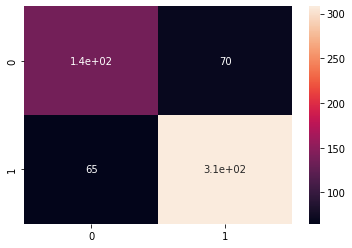

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)